In [4]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('drug200.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (200, 6)


In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [12]:
print(df.columns)


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [15]:
model_features = df.columns.drop('Age')
model_target = 'Age'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
Model target:  Age


In [16]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Na_to_K'], dtype='object')

Categorical columns: Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


In [17]:
df[model_target].value_counts()

47    8
49    7
23    7
28    7
39    6
32    6
50    5
37    5
22    5
60    5
58    5
45    4
42    4
43    4
57    4
51    4
56    4
61    4
65    4
67    4
68    4
72    4
41    4
74    4
26    4
36    4
34    4
20    4
31    4
24    4
38    3
70    3
69    3
18    3
64    3
59    3
40    3
15    3
53    3
35    3
16    3
46    2
29    2
73    2
52    2
62    2
55    2
48    2
66    2
19    2
17    1
54    1
63    1
21    1
30    1
25    1
33    1
Name: Age, dtype: int64

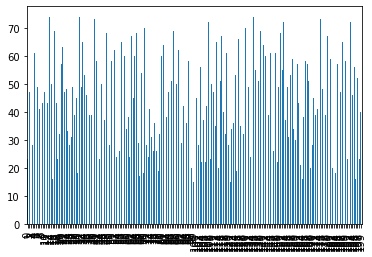

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()


Sex


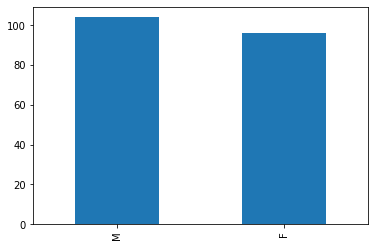

BP


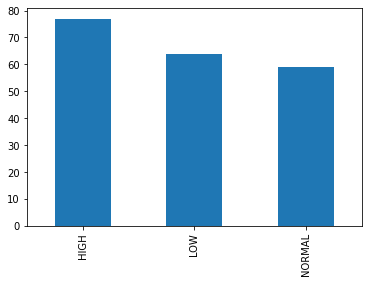

Cholesterol


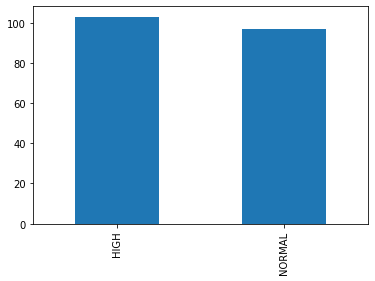

Drug


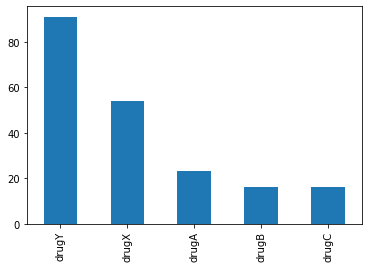

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

Drug


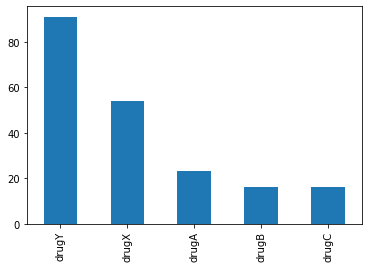

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

<AxesSubplot:>

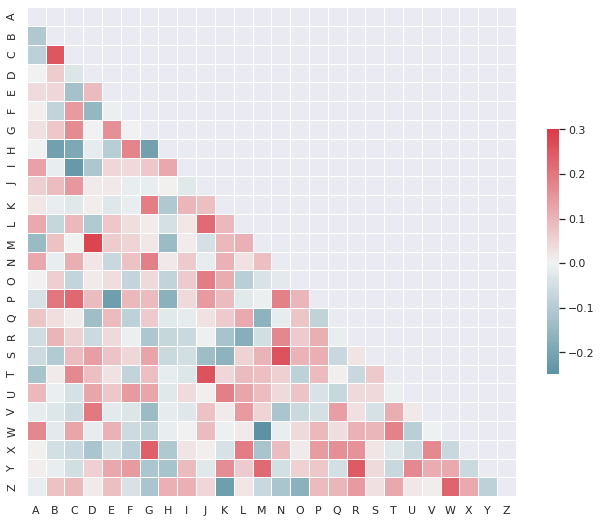

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})